## Introducción


El operador de telecomunicaciones Interconnect enfrenta el desafío de retener a sus clientes en un mercado altamente competitivo. La tasa de cancelación (o "churn") es un indicador clave para la empresa, ya que un aumento en el churn puede reflejar insatisfacción del cliente y potenciales pérdidas de ingresos. Al predecir la probabilidad de cancelación de los clientes, Interconnect puede identificar a aquellos en riesgo y ofrecer incentivos o beneficios que promuevan su lealtad, como descuentos, códigos promocionales y planes especiales.

En este proyecto, se realizará un análisis detallado de los datos disponibles para comprender los factores que afectan la tasa de churn. Además, se desarrollará un modelo de predicción de cancelación utilizando técnicas de aprendizaje automático.

## Objetivos del Proyecto


- Comprender los factores que influyen en la cancelación de clientes: Identificar las características y servicios que aumentan o disminuyen la probabilidad de que un cliente cancele su contrato.

- Analizar patrones y tendencias en los datos de clientes y contratos: Realizar un análisis exploratorio de los datos para descubrir tendencias y patrones que puedan ser útiles en la modelización del churn.

- Construir un modelo de predicción de cancelación: Desarrollar un modelo de clasificación que identifique a los clientes que tienen alta probabilidad de churn.
Ofrecer recomendaciones al equipo de marketing: Con base en el análisis y modelo, proporcionar recomendaciones de estrategias de retención para los clientes en riesgo de churn.

- Ofrecer recomendaciones al equipo de marketing: Con base en el análisis y modelo, proporcionar recomendaciones de estrategias de retención para los clientes en riesgo de churn.

## Plan de trabajo

## EDA

Iniciamos con el análisis exploratorio de datos.

### CARGA DE DATOS


In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, accuracy_score
from catboost import CatBoostClassifier

# Cargar archivos CSV
contract = pd.read_csv("datasets/contract.csv")
personal = pd.read_csv("datasets/personal.csv")
internet = pd.read_csv("datasets/internet.csv")
phone = pd.read_csv("datasets/phone.csv")

### ANÁLISIS INICIAL DE CADA DATAFRAME

In [61]:
def analisis(df):
    # Mostrar primeras filas del DataFrame
    print("Primeras filas del DataFrame:")
    display(df.head())
    # Información general del DataFrame
    print("\nInformación general:")
    print(df.info())
    print("\nForma del DataFrame:", df.shape) 
    # Verificar valores duplicados
    num_duplicates = df.duplicated().sum()
    print(f"\nCantidad de filas duplicadas: {num_duplicates}")   
    # Valores nulos
    print("\nCantidad de valores nulos por columna:")
    print(df.isnull().sum())   
    # Estadísticas descriptivas generales
    print("\nEstadísticas descriptivas (variables numéricas):")
    display(df.describe())  
    # Estadísticas descriptivas para variables categóricas
    print("\nEstadísticas descriptivas (variables categóricas):")
    display(df.describe(include=['O']))  # 'O' selecciona columnas de tipo 'object'   

In [62]:
# Función para realizar un análisis exploratorio rápido de cada DataFrame.
analisis(contract)

Primeras filas del DataFrame:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Forma del DataFrame: (7043, 8)

Cantidad de filas duplicadas: 0

Cantidad de valores nulos por columna:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Estadísticas descriptivas (variables numéricas):

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



Estadísticas descriptivas (variables categóricas):


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,
freq,1,366,5174,3875,4171,2365,11


Observación:

- Columnas BeginDate y EndDate tienen un tipo incorrecto
- Columna TotalChargues es de tipo incorrecto
- No se ven datos nulos o duplicados 

In [63]:
analisis(personal)

Primeras filas del DataFrame:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Forma del DataFrame: (7043, 5)

Cantidad de filas duplicadas: 0

Cantidad de valores nulos por columna:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Estadísticas descriptivas (variables numéricas):


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



Estadísticas descriptivas (variables categóricas):


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,7590-VHVEG,Male,No,No
freq,1,3555,3641,4933


Observación:
- No tenemos valores nulos o duplicados
- Observamos que la mayoría de características son binarias

In [64]:
analisis(internet)

Primeras filas del DataFrame:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

Forma del DataFrame: (5517, 8)

Cantidad de filas duplicadas: 0

Cantidad de valores nulos por columna:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Estadísticas descriptivas (variables numéricas):


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Estadísticas descriptivas (variables categóricas):


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Observación:
- No tenemos datos nulos o duplicados
- Las características son del tipo binario

In [65]:
analisis(phone)

Primeras filas del DataFrame:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Forma del DataFrame: (6361, 2)

Cantidad de filas duplicadas: 0

Cantidad de valores nulos por columna:
customerID       0
MultipleLines    0
dtype: int64

Estadísticas descriptivas (variables numéricas):


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390



Estadísticas descriptivas (variables categóricas):


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


Observación
- No se observan valores nulos o duplicados 

Es conveniente limpiar y corregir los datos, esto facilita el flujo de trabajo y también mejora la calidad y confiabilidad del trabajo.


Para continuar corregiremos los problemas en el dataframe contract: 

### LIMPIEZA Y PREPROCESAMIENTO DE DATOS INICIAL

In [66]:
print('Limpieza de Datos')
print()
# Imputación de valores nulos en TotalCharges 
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
# Eliminar filas con valores nulos en 'TotalCharges' pues son muy pocas (11)
contract.dropna(subset=['TotalCharges'], inplace=True)

# Corrección de tipos de datos en columnas de fecha
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

# Eliminar duplicados (si es necesario)
contract.drop_duplicates(inplace=True)
    
# Validar cambios
print("Resumen de datos después de limpieza:")
print(contract.info())


Limpieza de Datos

Resumen de datos después de limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 494.4+ KB
None


C:\Users\juan6\AppData\Local\Temp\ipykernel_23036\1792797708.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')


### ANÁLISIS DE VARIABLES

Después de la limpieza, observamos que la columna `EndDate` tiene valores nulos (NaT) en lugar de "No", lo cual indica que esos clientes no han terminado su contrato. 

Definimos funciones para mejorar el análisis y visualizar los datos.

In [67]:
# Función para distribución de Variables Numéricas
def distribucion_numericas(df):
    """
    Muestra la distribución de todas las columnas numéricas en el DataFrame.
    
    Args:
    df (pd.DataFrame): DataFrame a analizar.
    """
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        plt.figure(figsize=(6, 2))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribución de {column}')
        plt.show()

        plt.figure(figsize=(6, 2))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot de {column}')
        plt.show()


In [68]:
# Función para distribución de variables categóricas
def distribucion_categoricas(df, exclude_columns=None):
    """
    Muestra la distribución de todas las columnas categóricas en el DataFrame,
    exceptuando las especificadas en exclude_columns.
    
    Args:
    df (pd.DataFrame): DataFrame a analizar.
    exclude_columns (list): Lista de nombres de columnas a excluir del análisis.
    """
    if exclude_columns is None:
        exclude_columns = []
        
    # Filtrar columnas categóricas, excluyendo las que están en exclude_columns
    categorical_columns = [col for col in df.select_dtypes(include=['object']).columns 
                           if col not in exclude_columns]
    
    # Graficar distribución de cada columna categórica
    for column in categorical_columns:
        plt.figure(figsize=(6, 2))
        sns.countplot(data=df, x=column)
        plt.title(f'Distribución de {column}')
        plt.xticks(rotation=45)
        plt.show()


In [69]:
# Función para análisis temporal de churn
def analisis_churn_temporal(df,end_column):
    """
    Realiza un análisis temporal del churn basado en columnas de fecha de inicio y fecha de fin.
    Muestra la cantidad de clientes que se dieron de baja por año.

    Args:
    df (pd.DataFrame): DataFrame a analizar.
    start_column (str): Nombre de la columna de fecha de inicio en el DataFrame.
    end_column (str): Nombre de la columna de fecha de baja en el DataFrame.
    """
    
    # Clientes que se dieron de baja por año
    churn_by_year = df[end_column].dt.year.value_counts().sort_index()
        
    # Graficar la cantidad de clientes que se dieron de baja por año
    plt.figure(figsize=(6, 2))
    churn_by_year.plot(kind='bar', color='salmon')
    plt.title(f'Cantidad de clientes que se dieron de baja por año ({end_column})')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de bajas')
    plt.show()


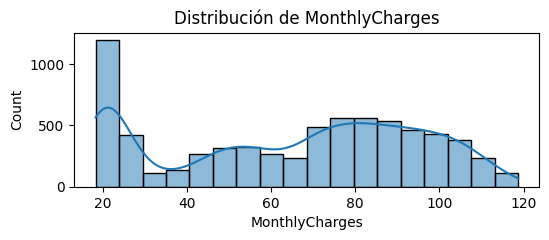

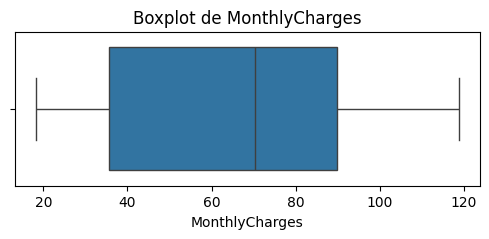

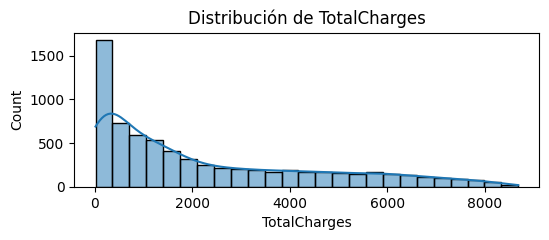

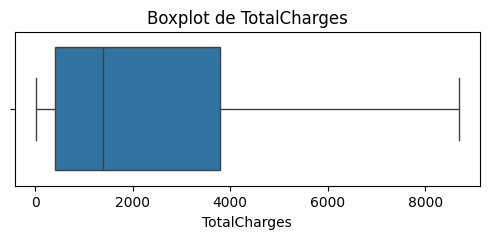

In [70]:
distribucion_numericas(contract)

- En cuanto a los cargos mensuales vemos que la mayoría prefiere pagar los planes más económicos, aunque vemos distribuciones amplias, eso nos indica la gran variedad de planes mensuales que se ofrecen.
- En cuanto a los cargos totales, vemos que está más concentrado hacia la parte baja y media, esto se espera, pues los clientes nuevos generarían menores cargos totales en un año, además de que los planes mensuales sean más usados.

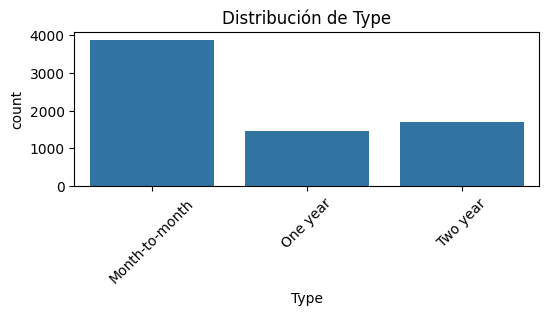

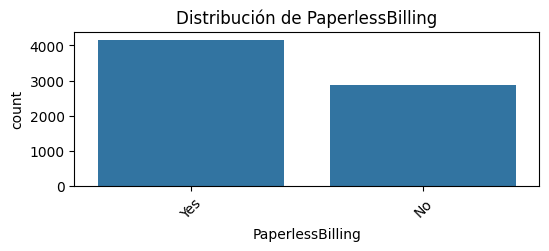

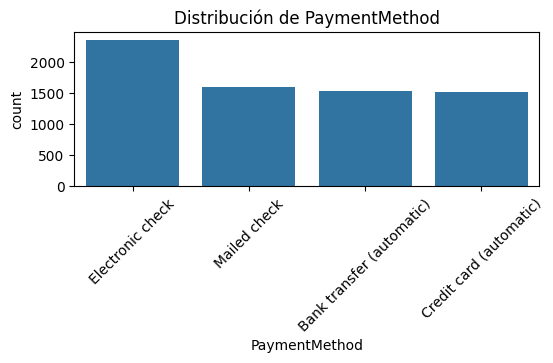

In [71]:
distribucion_categoricas(contract, exclude_columns=['customerID'])

- Podemos observar que la gran mayoría prefiere planes mensuales los cuales les dan mayor flexibilidad en cancelar, sería beneficioso generar estrategia para retener a estos clientes.
- También observamos que se prefiere la facturación electrónica, esto nos indicaría de una gran población joven que se tiene como clientes.
- También observamos que la mayor preferencia de forma de pago es el método electrónico. 

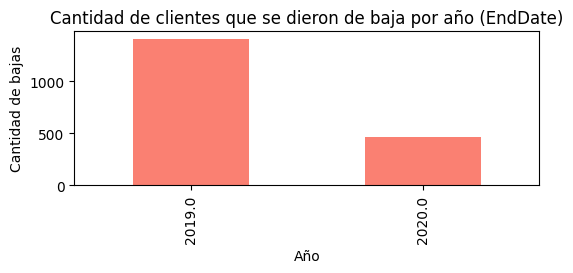

In [72]:
analisis_churn_temporal(contract,'EndDate')

Observamos que los clientes que en su mayoría se dieron de baja es en el año 2019,  y en menor medida en el año 2020, esto puede deberse a que no se tienen tantos datos de este año, aunque podría ser por buenas estrategias de retención.

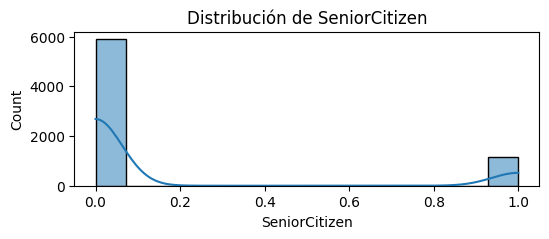

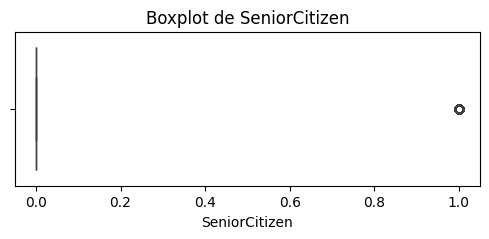

In [73]:
distribucion_numericas(personal)

Vemos que la gran mayoría son personas jóvenes y no personas mayores.

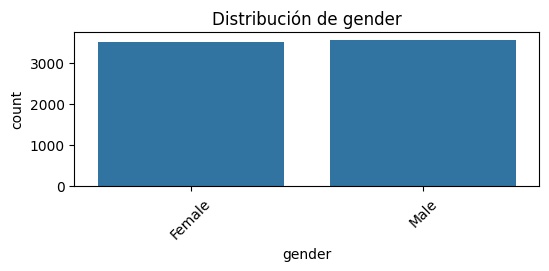

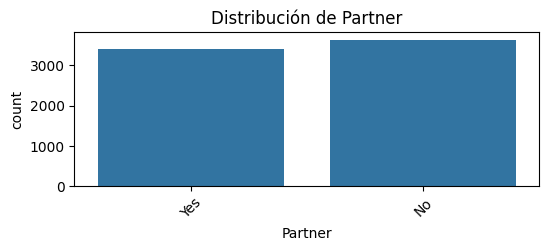

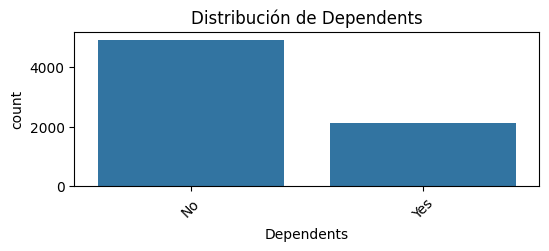

In [74]:
distribucion_categoricas(personal, exclude_columns=['customerID'])

Vemos que en cuanto a géneros las cantidades son parecidas para los clientes, al igual que los clientes que tienen parejas de los que no los tienen y vemos una diferencia en cuanto a las personas que tienen a alguien dependiente o a cargo de ellos siendo estos una tercera parte de todos los clientes.  

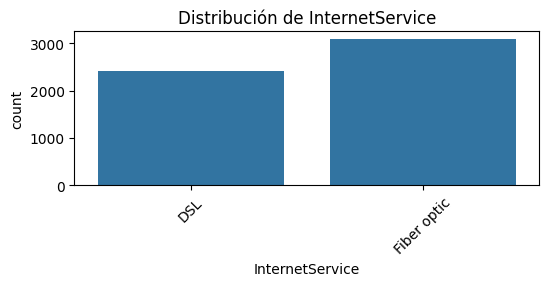

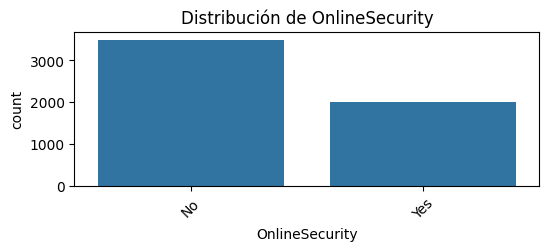

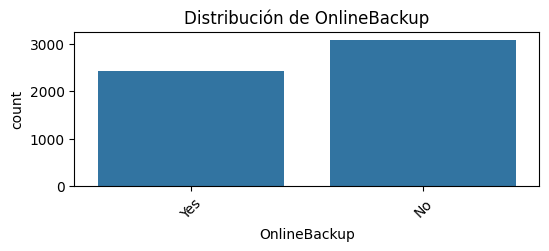

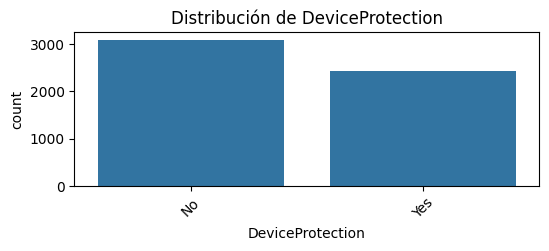

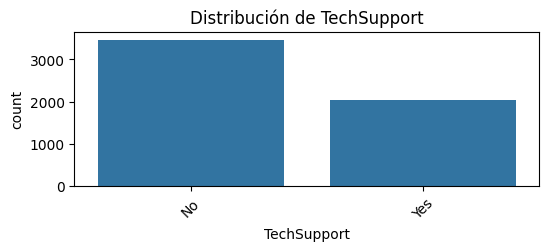

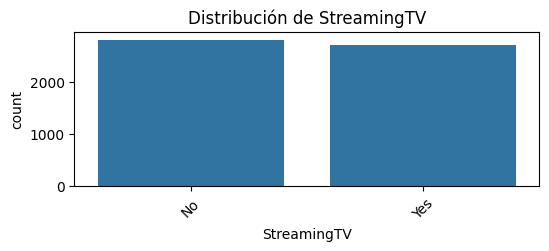

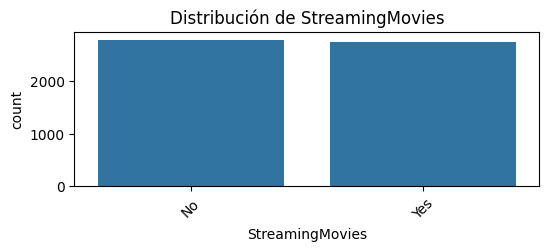

In [75]:
distribucion_categoricas(internet, exclude_columns=['customerID'])

Podemos observar que los clientes prefieren más la fibra óptica, y la cantidad de los que contratan servicios de streaming son equivalentes a los que no lo hacen, observamos también que la mayoría prefiere no contratar servicios de protección contra virus o malware, también son más los que  no prefieren contratar servicios de respaldo en la nube.

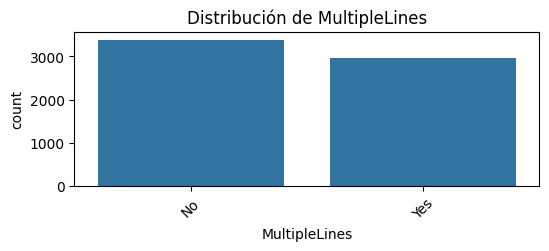

In [76]:
distribucion_categoricas(phone, exclude_columns=['customerID'])

La mayoría de clientes no tienen multiples lines de teléfonos, esto podría deberse también a que no tienen personas dependientes a su cargo. 

#### UNIÓN DE DATAFRAMES Y CREACIÓN DE VARIABLE `Churn`

In [77]:
# Integramos todos los DataFrames en uno solo para realizar un análisis más completo.
data = contract.merge(personal, on='customerID', how='inner') \
               .merge(internet, on='customerID', how='inner') \
               .merge(phone, on='customerID', how='inner')


In [78]:
# Crear columna `Churn`, asignando 1 a clientes con `EndDate` y 0 a los que tienen `NaT` en `EndDate`.
data['Churn'] = data['EndDate'].notnull().astype(int)  # 1 si EndDate tiene valor, 0 si es NaT

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        4832 non-null   object        
 1   BeginDate         4832 non-null   datetime64[ns]
 2   EndDate           1586 non-null   datetime64[ns]
 3   Type              4832 non-null   object        
 4   PaperlessBilling  4832 non-null   object        
 5   PaymentMethod     4832 non-null   object        
 6   MonthlyCharges    4832 non-null   float64       
 7   TotalCharges      4832 non-null   float64       
 8   gender            4832 non-null   object        
 9   SeniorCitizen     4832 non-null   int64         
 10  Partner           4832 non-null   object        
 11  Dependents        4832 non-null   object        
 12  InternetService   4832 non-null   object        
 13  OnlineSecurity    4832 non-null   object        
 14  OnlineBackup      4832 n

In [80]:
data

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn
0,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
1,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,1
2,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,1
3,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50,Female,0,...,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,1
4,1452-KIOVK,2018-04-01,NaT,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Male,0,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,8456-QDAVC,2018-07-01,NaT,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,Male,0,...,No,Fiber optic,No,No,No,No,Yes,No,No,0
4828,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50,Male,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,0
4829,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,...,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,0
4830,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,...,No,Fiber optic,No,No,No,No,No,No,Yes,1


#### Analizaremos la variable Churn con otras características:

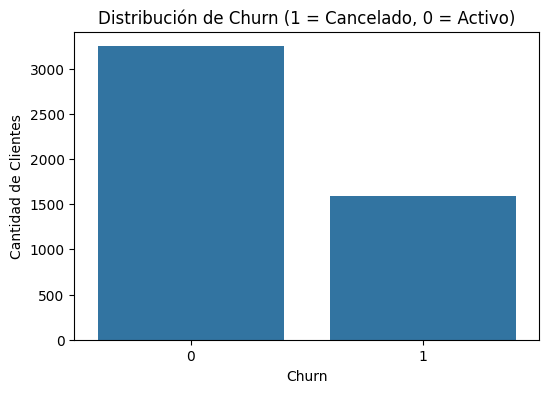


Churn
0    3246
1    1586
Name: count, dtype: int64


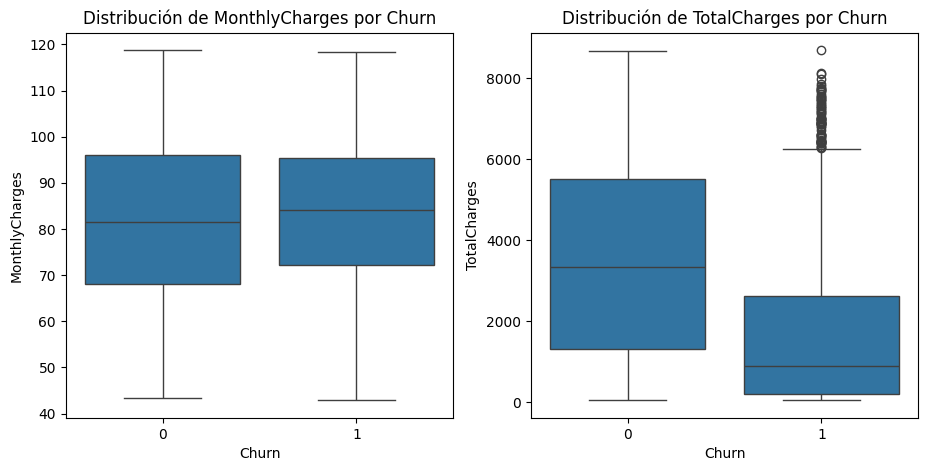

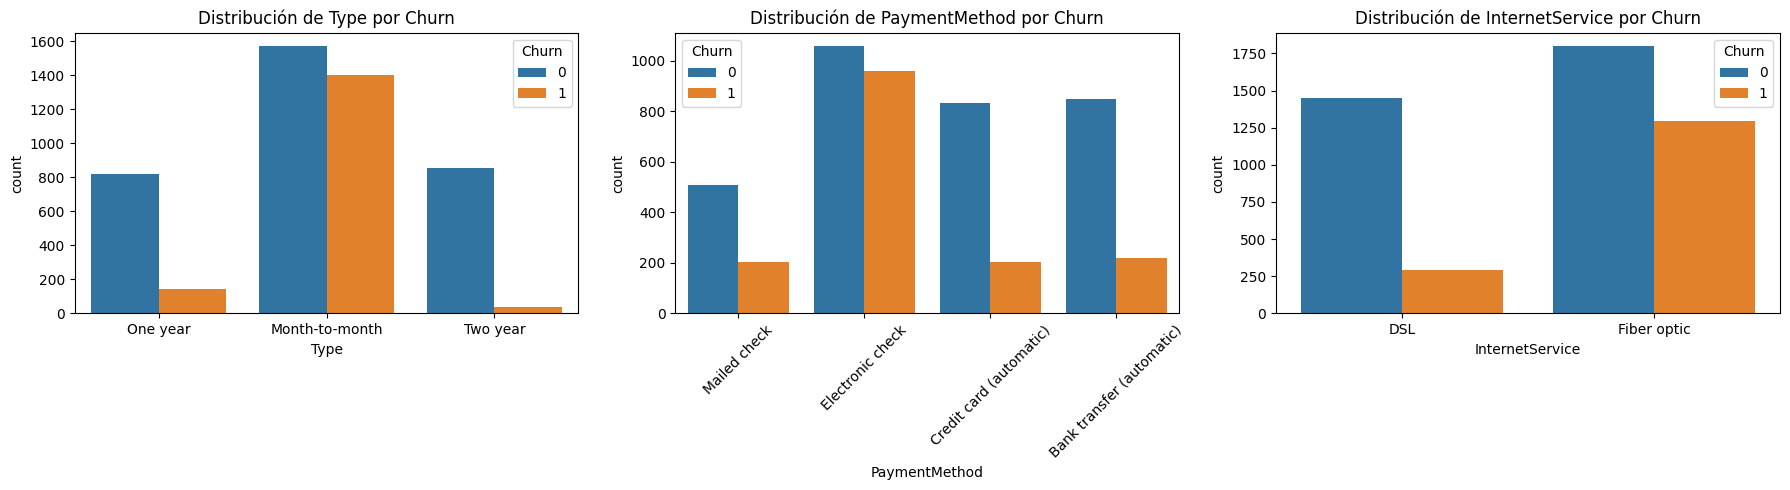

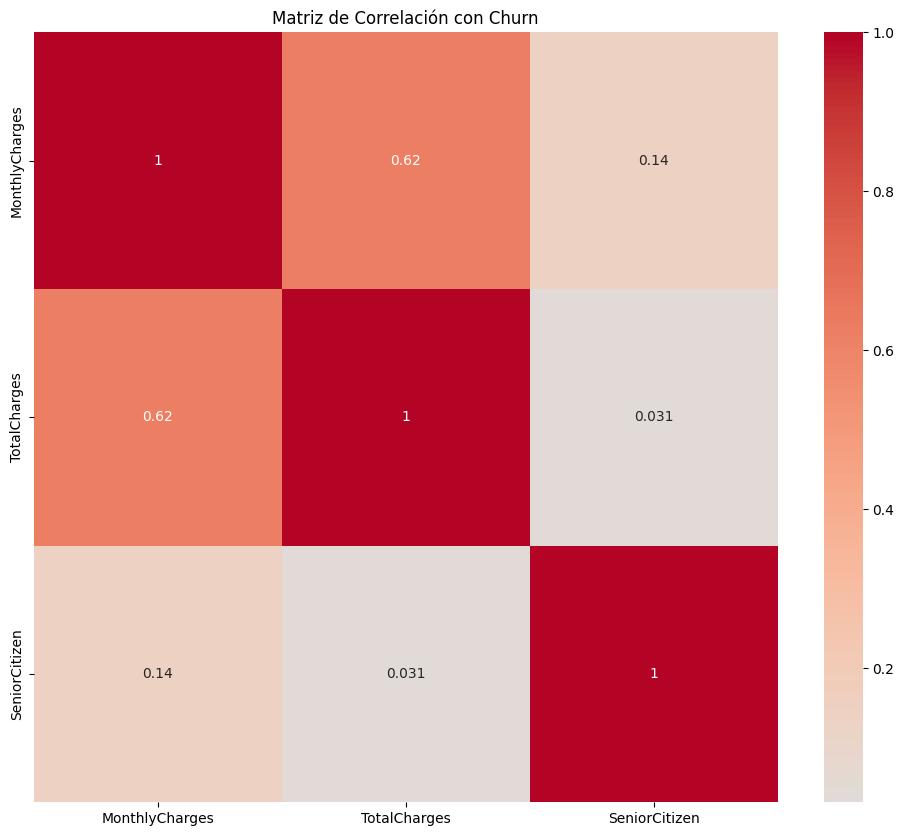

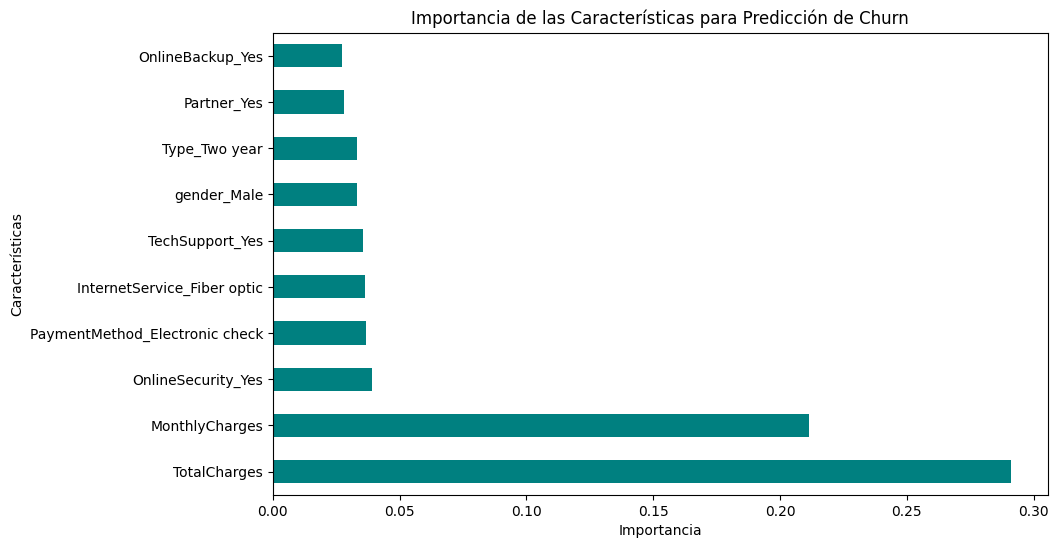

In [81]:
#Distribución de `Churn`

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(data=data, x='Churn', ax=ax)
ax.set_title("Distribución de Churn (1 = Cancelado, 0 = Activo)")
ax.set_xlabel("Churn")
ax.set_ylabel("Cantidad de Clientes")
plt.show()
print()
print(data['Churn'].value_counts())

# Relación entre Variables Numéricas y `Churn` (Boxplots)

fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[0])
axes[0].set_title("Distribución de MonthlyCharges por Churn")

# TotalCharges
sns.boxplot(x='Churn', y='TotalCharges', data=data, ax=axes[1])
axes[1].set_title("Distribución de TotalCharges por Churn")

# Relación entre Variables Categóricas y `Churn` (Countplots)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Type (Tipo de contrato)
sns.countplot(x='Type', hue='Churn', data=data, ax=axes[0])
axes[0].set_title("Distribución de Type por Churn")

# PaymentMethod (Método de pago)
sns.countplot(x='PaymentMethod', hue='Churn', data=data, ax=axes[1])
axes[1].set_title("Distribución de PaymentMethod por Churn")
axes[1].tick_params(axis='x', rotation=45)

# InternetService (Tipo de servicio de Internet)
sns.countplot(x='InternetService', hue='Churn', data=data, ax=axes[2])
axes[2].set_title("Distribución de InternetService por Churn")

plt.tight_layout()
plt.show()

# Matriz de Correlación con `Churn`

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Matriz de Correlación con `Churn`
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación con Churn")
plt.show()

# Importancia de Características (Feature Importance) usando Bosque Aleatorio

# Preparar los datos para el modelo
X = data.drop(['Churn', 'customerID', 'BeginDate', 'EndDate'], axis=1)
y = data['Churn']

# Convertir variables categóricas a dummies
X = pd.get_dummies(X, drop_first=True)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar un modelo simple de Bosque Aleatorio
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Mostrar la importancia de características
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
importances[:10].plot(kind='barh', color='teal')
plt.title("Importancia de las Características para Predicción de Churn")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


Observaciones:
- Los clientes activos son más de los que se dieron de baja, sin embargo, los que se dieron de baja son una tercera parte de todos los datos que tenemos.
- Los cargos mensuales son parecidos para los clientes que continuan y los que se fueron, por lo que no se ven diferencias a simple vista.
- Los cargos totales son mayores en clientes que no cancelaron, esto es normal, pues la permanencia a largo plazo sigue acumulándose, vemos que en la caja de los clientes que abandonaron se presentan valores atípicos, esto quizá por clientes que tenían mucho tiempo contratando el servicio conjuntamente con cargos mensuales altos, y que recientemente cancelaron.
- Los planes mensuales tienen mayor tasa de cancelación, al igual que pagando por medio de cheques electrónicos y vemos que la fibra óptica tienen mayor tasa de cancelación, por lo que se debería de realizar mejorar este servicio.
- Se observa que los cargos, ya sean mensuales o totales, tienen importancia para la elección en churn.

Veamos la cantidad de valores atípicos.

In [82]:

# Filtramos solo los clientes donde churn = 1
churn_1_data = data[data['Churn'] == 1]

# Calculamos el primer y tercer cuartil de TotalCharges solo para clientes churn = 1
Q1 = churn_1_data['TotalCharges'].quantile(0.25)
Q3 = churn_1_data['TotalCharges'].quantile(0.75)

# Calculamos el IQR
IQR = Q3 - Q1

# Definimos los límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los valores atípicos en TotalCharges para churn = 1
outliers_churn_1 = churn_1_data[(churn_1_data['TotalCharges'] < lower_bound) | (churn_1_data['TotalCharges'] > upper_bound)]

# Contamos los valores atípicos
num_outliers_churn_1 = outliers_churn_1.shape[0]

print(f"Número de valores atípicos en 'TotalCharges' para churn = 1: {num_outliers_churn_1}")



Número de valores atípicos en 'TotalCharges' para churn = 1: 71


Vemos que los valores atípicos son apenas 71, recordemos que anteriormente vimos que los clientes que cancelaron ascienden a 1586, por lo que no es significativa estas cantidades, y se deben a clientes que se mantuvieron contratados por largo tiempo y con cargos mensuales altos y le pusieron fin a su contrato.

## CREACIÓN DE MODELOS

### Regresión Logística One-Hot Encoding

In [83]:
# Eliminar columnas irrelevantes
data = data.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

# Convertir variables categóricas a One-Hot Encoding
categorical_columns = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 
                       'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'MultipleLines']

# Aplicar OHE y eliminar la primera columna para evitar colinealidad
data_ohe = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Separar las características (X) y la variable objetivo (y)
X = data_ohe.drop(columns=['Churn'], axis=1)
y = data_ohe['Churn']

# Dividir en conjunto de entrenamiento (70%) y conjunto temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1234)

# Dividir el conjunto temporal en validación (15%) y prueba (15%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234)

# Seleccionar solo las columnas numéricas que queremos estandarizar
numeric = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
scaler = StandardScaler()

# Ajustar el escalador solo en el conjunto de entrenamiento
scaler.fit(X_train[numeric])

# Transformar las características numéricas en todos los conjuntos
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

Realizamos los pasos para preparar los datos para el modelado de machine learning:
- Eliminamos columnas irrelevantes (customerID, BeginDate, EndDate).
- Luego aplicamos One-Hot para variables categóricas, eliminando la primera columna para evitar colinealidad.
- Luego dividimos los datos en conjunto de entrenamiento, validación y prueba (80%-10%-10%).
- Finalmente, estandarizamos caracteristicas numericas seleccionadas (MonthlyCharges, TotalCharges, SeniorCitizen).

### Regresión Logística con balanceó

In [84]:
# Entrenar el modelo de regresión logística con balanceo
model_lr_bal = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model_lr_bal.fit(X_train, y_train)

# Evaluar en el conjunto de validación
predicted_valid_lr = model_lr_bal.predict(X_valid)
probabilities_valid_lr = model_lr_bal.predict_proba(X_valid)[:, 1]

accuracy_valid_lr = accuracy_score(y_valid, predicted_valid_lr)
auc_roc_valid_lr = roc_auc_score(y_valid, probabilities_valid_lr)
f1_val_lr = f1_score(y_valid, predicted_valid_lr)

print(f"Regresión Logística - Exactitud en validación: {accuracy_valid_lr:.2f}")
print(f"Regresión Logística - AUC-ROC en validación: {auc_roc_valid_lr:.2f}")
print(f"F1 Score en el conjunto de validación: {f1_val_lr:.2f}")


# Evaluar en el conjunto de prueba con balanceo 
predicted_test_lr = model_lr_bal.predict(X_test)
probabilities_test_lr = model_lr_bal.predict_proba(X_test)[:, 1]

accuracy_test_lr = accuracy_score(y_test, predicted_test_lr)
auc_roc_test_lr = roc_auc_score(y_test, probabilities_test_lr)
f1_test_lr = f1_score(y_test, predicted_test_lr)

print(f"\nRegresión Logística - Exactitud en prueba: {accuracy_test_lr:.2f}")
print(f"Regresión Logística - AUC-ROC en prueba: {auc_roc_test_lr:.2f}")
print(f"F1 Score en el conjunto de prueba: {f1_test_lr:.2f}")

Regresión Logística - Exactitud en validación: 0.73
Regresión Logística - AUC-ROC en validación: 0.82
F1 Score en el conjunto de validación: 0.64

Regresión Logística - Exactitud en prueba: 0.73
Regresión Logística - AUC-ROC en prueba: 0.82
F1 Score en el conjunto de prueba: 0.65


El modelo de regresión logística se balanceó con el hiperparámetro: class_weight='balanced'y solver='liblinear'.
- Los resultados muestran una exactitud del 73% en ambos conjuntos, lo que indica una capacidad moderada para clasificar correctamente.
- El AUC-ROC de 0.81 en validación y 0.82 nos dice que el modelo tiene una buena habilidad para distinguir entre las clases de Churn y no-Churn. Esto es positivo, ya que el AUC-ROC es un mejor indicador de desempeño en contextos de datos desbalanceados. 
- El F1 Score es de 0.65 que es un valor aceptable, pero que aún se podría mejorar, sin embargo, es lo que mejor se logró en regresión logística ajustando hiperparámetros.

### Regresión Logística con balanceó y ajustando el umbral para mejorar la exactitud

In [85]:
#MODIFICANDO UMBRAL PARA LA EXACTITUD

# Entrenar el modelo de regresión logística
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
probabilities_valid_logi = model_lr.predict_proba(X_valid)[:, 1]
probabilities_test_logi = model_lr.predict_proba(X_test)[:, 1]

# Definir variables para el mejor umbral, exactitud y F1 Score en validación
best_threshold_valid = 0
best_accuracy_valid = 0
best_f1_valid = 0

# Evaluación en el conjunto de validación con ajuste de umbral
for threshold in np.arange(0, 1.0, 0.02):
    predicted_valid_logi_umbral = probabilities_valid_logi > threshold
    accuracy_valid_umbral = accuracy_score(y_valid, predicted_valid_logi_umbral)
    f1_valid_umbral = f1_score(y_valid, predicted_valid_logi_umbral)
    
    # Guardar el mejor umbral, su exactitud y F1 Score en validación
    if accuracy_valid_umbral > best_accuracy_valid:
        best_accuracy_valid = accuracy_valid_umbral
        best_f1_valid = f1_valid_umbral
        best_threshold_valid = threshold

# Calcular AUC-ROC en el conjunto de validación (sin cambiar el umbral)
auc_roc_logi_valid = roc_auc_score(y_valid, probabilities_valid_logi)

print(f"\nMejor Threshold (Validación): {best_threshold_valid:.2f}")
print(f"Mejor Exactitud (Validación): {best_accuracy_valid:.2f}")
print(f"Mejor F1 Score (Validación): {best_f1_valid:.2f}")
print(f"AUC-ROC (Validación): {auc_roc_logi_valid:.2f}")

# Evaluación en el conjunto de prueba usando el mejor umbral encontrado en validación
predicted_test_logi_umbral = probabilities_test_logi > best_threshold_valid
accuracy_test_umbral = accuracy_score(y_test, predicted_test_logi_umbral)
f1_test_umbral = f1_score(y_test, predicted_test_logi_umbral)

# Calcular AUC-ROC en el conjunto de prueba (sin cambiar el umbral)
auc_roc_logi_test = roc_auc_score(y_test, probabilities_test_logi)

print(f"\nExactitud en prueba con mejor umbral: {accuracy_test_umbral:.2f}")
print(f"F1 Score en prueba con mejor umbral: {f1_test_umbral:.2f}")
print(f"AUC-ROC en prueba: {auc_roc_logi_test:.2f}")


Mejor Threshold (Validación): 0.72
Mejor Exactitud (Validación): 0.76
Mejor F1 Score (Validación): 0.56
AUC-ROC (Validación): 0.82

Exactitud en prueba con mejor umbral: 0.77
F1 Score en prueba con mejor umbral: 0.60
AUC-ROC en prueba: 0.82


- La regresión logística con ajuste de umbral, mejoró la exactitud, pero se empeoró el F1 Score, esto por el problema de desbalance de clases en Churn.

### Árbol de Decisión  con balanceo 

In [86]:
# Entrenar el modelo de Árbol de Decisión
model_tree = DecisionTreeClassifier(
    max_depth=10,            # Profundidad máxima del árbol
    class_weight='balanced', # Ajuste de peso para clases desbalanceadas
    random_state=12345      # Reproducibilidad
)
model_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
probabilities_valid_tree = model_tree.predict_proba(X_valid)[:, 1]

# Inicializar variables para encontrar el mejor umbral
best_threshold_valid = 0
best_accuracy_valid = 0
best_f1_valid = 0

# Ajuste de umbral en el conjunto de validación
for threshold in np.arange(0, 1.01, 0.01):
    predicted_valid_tree_umbral = probabilities_valid_tree > threshold
    accuracy_valid_umbral = accuracy_score(y_valid, predicted_valid_tree_umbral)
    f1_valid_umbral = f1_score(y_valid, predicted_valid_tree_umbral)

    # Actualizar mejor umbral basado en la exactitud
    if accuracy_valid_umbral > best_accuracy_valid:
        best_accuracy_valid = accuracy_valid_umbral
        best_threshold_valid = threshold
        best_f1_valid = f1_valid_umbral

# Calcular AUC-ROC en el conjunto de validación (sin cambiar el umbral)
auc_roc_tree_valid = roc_auc_score(y_valid, probabilities_valid_tree)

print(f"\nMejor Threshold (Validación): {best_threshold_valid:.2f}")
print(f"Mejor Exactitud (Validación): {best_accuracy_valid:.2f}")
print(f"AUC-ROC (Validación): {auc_roc_tree_valid:.2f}")
print(f"Mejor F1 Score (Validación): {best_f1_valid:.2f}")

# Evaluar en el conjunto de prueba con el mejor umbral
probabilities_test_tree = model_tree.predict_proba(X_test)[:, 1]
predicted_test_tree_umbral = probabilities_test_tree > best_threshold_valid

# Calcular métricas en el conjunto de prueba
accuracy_test_umbral = accuracy_score(y_test, predicted_test_tree_umbral)
f1_test_umbral = f1_score(y_test, predicted_test_tree_umbral)
auc_roc_tree_test = roc_auc_score(y_test, probabilities_test_tree)

print(f"\nExactitud en prueba con mejor umbral: {accuracy_test_umbral:.2f}")
print(f"AUC-ROC en prueba: {auc_roc_tree_test:.2f}")
print(f"F1 Score en prueba con mejor umbral: {f1_test_umbral:.2f}")



Mejor Threshold (Validación): 0.71
Mejor Exactitud (Validación): 0.73
AUC-ROC (Validación): 0.73
Mejor F1 Score (Validación): 0.56

Exactitud en prueba con mejor umbral: 0.71
AUC-ROC en prueba: 0.70
F1 Score en prueba con mejor umbral: 0.52


- Aquí se ajustaron hiperparámetros para obtener el mejor rendimiento, sin embargo, los valores son peores que en la regresión logística, por lo que sería mejor implementar más modelos, pues el mayor problema sigue siendo el F1 Score.

### Bosque Aleatorio con balanceo

In [87]:
# Entrenar el modelo de bosque aleatorio con ajuste de pesos de clase
model_rf_class_weight = RandomForestClassifier(random_state=12345, max_depth=6, class_weight='balanced')
model_rf_class_weight.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
probabilities_test_rf_class_weight = model_rf_class_weight.predict_proba(X_test)[:, 1]

# Definir variables para el mejor umbral y su exactitud en prueba
best_threshold_test = 0
best_accuracy_test = 0
best_f1_test = 0 

# Evaluación en el conjunto de prueba con ajuste de umbral
for threshold in np.arange(0, 0.92, 0.02):
    predicted_test_forest_umbral = probabilities_test_rf_class_weight > threshold
    accuracy_test_forest_umbral = accuracy_score(y_test, predicted_test_forest_umbral)
    f1_test_forest_umbral = f1_score(y_test, predicted_test_forest_umbral)

    # Guardar el mejor umbral y su exactitud en prueba
    if accuracy_test_forest_umbral > best_accuracy_test:
        best_accuracy_test = accuracy_test_forest_umbral
        best_threshold_test = threshold
        best_f1_test = f1_test_forest_umbral

# Calcular AUC-ROC en el conjunto de prueba (sin cambiar el umbral)
auc_roc_forest_test = roc_auc_score(y_test, probabilities_test_rf_class_weight)  

print(f"\nMejor threshold en prueba: {best_threshold_test}")
print(f"Mejor Exactitud en prueba con umbral ajustado: {best_accuracy_test:.2f}")
print(f"AUC-ROC en prueba: {auc_roc_forest_test:.2f}")
print(f"Mejor F1 Score en prueba con umbral ajustado: {best_f1_test:.2f}")


Mejor threshold en prueba: 0.58
Mejor Exactitud en prueba con umbral ajustado: 0.77
AUC-ROC en prueba: 0.82
Mejor F1 Score en prueba con umbral ajustado: 0.66


- Aquí obtenemos valores aceptables en F1 Score como es 0.66.
- Los mejores valores son el AUC-ROC que nos da 0.82.
- Todo ello se logró con el ajuste de hiperparámetros y ajuste de umbral.
- Si bien tenemos resultados aceptables, se debería seguir buscando más modelos para obtener mejores resultados en las métricas de evaluación.

### CatBoost

In [88]:
# Definir las columnas categóricas y la variable objetivo
categorical_columns = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 
                       'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'MultipleLines']
target_column = 'Churn'

# Dividir las características y la variable objetivo
X = data.drop(columns=[target_column])
y = data[target_column]

# Dividir los datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=12345)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12345)

# Crear el modelo CatBoost con hiperparámetros ajustados
model = CatBoostClassifier(
    loss_function="Logloss",
    iterations=36,           # Más iteraciones para un mejor ajuste
    learning_rate=0.1,        # Tasa de aprendizaje moderada
    depth=7,                  # Profundidad para capturar relaciones relevantes
    l2_leaf_reg=11,            # Regularización L2
    bagging_temperature=1,    # Aleatoriedad moderada en el muestreo
    random_strength=1,        # Aleatoriedad en la división de nodos
    class_weights={0: 1, 1: 2},  # Peso extra para la clase minoritaria
    random_seed=12345,
    cat_features=categorical_columns,
    verbose=10               # Mostrar progreso cada 10 iteraciones
)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Predicciones y probabilidades para validación
probabilities_valid = model.predict_proba(X_valid)[:, 1]
predicted_valid = model.predict(X_valid)

# Métricas en el conjunto de validación
auc_roc_valid = roc_auc_score(y_valid, probabilities_valid)
f1_valid = f1_score(y_valid, predicted_valid)
accuracy_valid = accuracy_score(y_valid, predicted_valid)

print(f"Métricas en Validación:\nAUC-ROC: {auc_roc_valid:.2f}, F1 Score: {f1_valid:.2f}, Exactitud: {accuracy_valid:.2f}")

# Predicciones y probabilidades para prueba
probabilities_test = model.predict_proba(X_test)[:, 1]
predicted_test = model.predict(X_test)

# Métricas en el conjunto de prueba
auc_roc_test = roc_auc_score(y_test, probabilities_test)
f1_test = f1_score(y_test, predicted_test)
accuracy_test = accuracy_score(y_test, predicted_test)

print(f"Métricas en Prueba:\nAUC-ROC: {auc_roc_test:.2f}, F1 Score: {f1_test:.2f}, Exactitud: {accuracy_test:.2f}")

0:	learn: 0.6755348	total: 23.7ms	remaining: 831ms
10:	learn: 0.5756315	total: 285ms	remaining: 649ms
20:	learn: 0.5408000	total: 564ms	remaining: 403ms
30:	learn: 0.5226421	total: 825ms	remaining: 133ms
35:	learn: 0.5176827	total: 945ms	remaining: 0us
Métricas en Validación:
AUC-ROC: 0.85, F1 Score: 0.70, Exactitud: 0.76
Métricas en Prueba:
AUC-ROC: 0.85, F1 Score: 0.71, Exactitud: 0.76


- Tanto en validación como en prueba, el AUC-ROC se mantiene en 0.85. Esto indica que el modelo tiene una capacidad para distinguir entre las clases positiva y negativa.
- El F1 Score de 0.70 (validación) y 0.71 (prueba) se mejoró en comparación con otros modelos.
- La exactitud del 76% en ambos conjuntos muestra que el modelo tiene un buen rendimiento general.
- Las métricas son prácticamente iguales en validación y prueba, lo que sugiere que el modelo está bien ajustado y no sufre de sobreajuste.
- La configuración de class_weights={0: 1, 1: 2} ayudó a manejar el desbalance de clases.

### ELECCION DEL MEJOR MODELO : CatBoost

- El mejor modelo, luego de ver todas las métricas, es el modelo de potenciación de gradiente CatBoost, con unas métricas de evaluación para el conjunto de prueba de:
AUC-ROC: 0.85, F1 Score: 0.71, Exactitud: 0.76.



## CONCLUSIONES 

- Se analizaron las características de los datos, incluyendo valores faltantes, duplicados, y estadísticas descriptivas, preprocesamos los datos, se convirtieron las columnas categóricas en variables compatibles con los modelos.
Se trató el desbalance de clases utilizando estrategias como class_weight. 
División del conjunto de datos: Se dividieron en entrenamiento, validación y prueba (70-15-15).
- Entrenamos de múltiples modelos como, Regresión logística, árbol de decisión, bosque aleatorio y CatBoost.
- Ajuste de hiperparámetros:
Se probaron distintas profundidades, tasas de aprendizaje, y regularizaciones para CatBoost, se ajustaron umbrales para maximizar la exactitud, el F1 ScoreSe y calcularon las métricas principales (AUC-ROC, F1 Score y Exactitud).
- El dataset tenía una cantidad significativamente menor de clientes que cancelaron (Churn = 1) en comparación con los que no cancelaron (Churn = 0), con ello tendríamos un problema de desbalance.
- Los resultados muestran que estrategias como class_weight y el uso de modelos robustos como CatBoost ayudan a mitigar el impacto del desbalance, pero no lo eliminan por completo. Esto es evidente en los F1 Scores más bajos en comparación con otras métricas.
- Ajustamos el umbral de decisión de los modelos para priorizar las métricas según los objetivos del negocio.
- Probamos diferentes modelos como CatBoost, que maneja automáticamente datos categóricos.
- Probar varios algoritmos, incluyendo regresión logística, árboles de decisión, bosque aleatorio y CatBoost, permitió identificar las fortalezas y debilidades de cada uno.
- Especialmente para CatBoost, ajustar parámetros como iterations, learning_rate, y depth resultó clave para alcanzar métricas de alta calidad.
- Modificar el umbral de decisión en función de la métrica objetivo (F1 Score, exactitud) mejoró el rendimiento en validación y prueba.
- La regresión logística balanceada alcanza un AUC-ROC de 0.82, lo que indica que discrimina bien entre clases. Sin embargo, su F1 Score (0.65) es más bajo que CatBoost, mostrando que tiene dificultades para manejar la clase minoritaria (clientes que cancelan).
- Con un AUC-ROC de 0.70 y F1 Score de 0.52 en el conjunto de prueba, los árboles de decisión tienen el peor desempeño general. Esto sugiere que son menos efectivos para capturar relaciones complejas en los datos y que tienden a sobreajustarse si no se regulan bien.
- Con un AUC-ROC de 0.82, F1 Score de 0.66 y Exactitud de 0.77 en el conjunto de prueba, el bosque aleatorio es competitivo. Sin embargo, no alcanza el nivel de CatBoost, probablemente porque no optimiza de manera tan efectiva las características categóricas.
- Con un AUC-ROC de 0.85, F1 Score de 0.71 y Exactitud de 0.76 en el conjunto de prueba, CatBoost supera a los otros modelos en todas las métricas clave. Esto sugiere que su capacidad para manejar datos categóricos y sus optimizaciones internas lo hacen ideal para este proyecto.